# Apple Store Reviews

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Apple_Store_Reviews.csv')

# Display the first few rows to inspect the structure
df.head()

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music


In [7]:
# Calculate mean, median, and mode of the ratings
mean_rating = df["Rating"].mean()
median_rating = df["Rating"].median()
mode_rating = df["Rating"].mode().values[0]  # Mode can return multiple values; taking the first one

mean_rating, median_rating, mode_rating


(np.float64(2.869), np.float64(3.0), np.int64(1))

In [9]:
# Calculate range and interquartile range (IQR) of Purchase_Amount
purchase_min = df["Purchase_Amount"].min()
purchase_max = df["Purchase_Amount"].max()
range_purchase = purchase_max - purchase_min

Q1 = df["Purchase_Amount"].quantile(0.25)
Q3 = df["Purchase_Amount"].quantile(0.75)
IQR_purchase = Q3 - Q1

range_purchase, IQR_purchase


(np.float64(19.97), np.float64(10.192499999999999))

In [11]:
# Calculate variance and standard deviation for the "Likes" column
variance_likes = df["Likes"].var()
std_dev_likes = df["Likes"].std()

variance_likes, std_dev_likes


(np.float64(822.8546786786787), np.float64(28.685443672334557))

In [13]:
# Calculate the correlation between "Likes" and "Rating"
correlation_likes_rating = df["Likes"].corr(df["Rating"])
correlation_likes_rating


np.float64(0.8425414470584173)

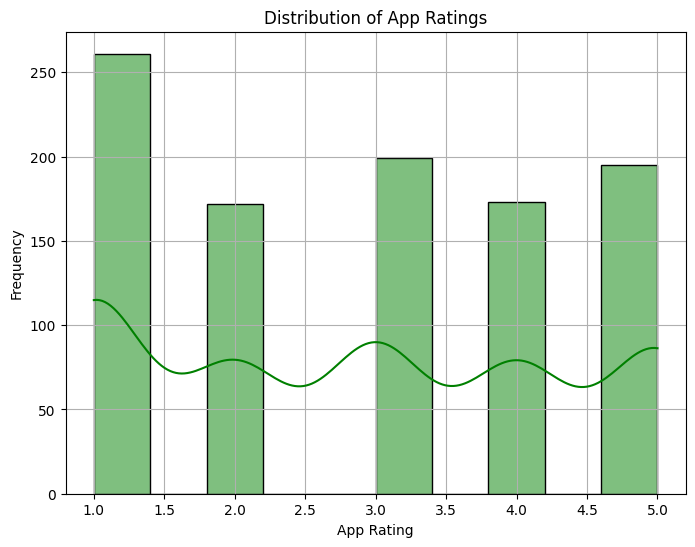

np.float64(0.10182054838079216)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of app ratings
plt.figure(figsize=(8, 6))
sns.histplot(df["Rating"], bins=10, kde=True, color="green")
plt.xlabel("App Rating")# Add labels and title
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")
plt.grid(True)
plt.show()# Show the plot

# Calculate skewness
skewness_rating = df["Rating"].skew()
skewness_rating


In [25]:

from scipy import stats

# Filter ratings for Instagram and WhatsApp
instagram_ratings = df[df["App_Name"] == "Instagram"]["Rating"]
whatsapp_ratings = df[df["App_Name"] == "WhatsApp"]["Rating"]

# Perform independent t-test (one-tailed)
t_stat, p_value = stats.ttest_ind(instagram_ratings, whatsapp_ratings, alternative='greater', equal_var=False)

t_stat, p_value


(np.float64(-0.7968909457614618), np.float64(0.7868031798338273))

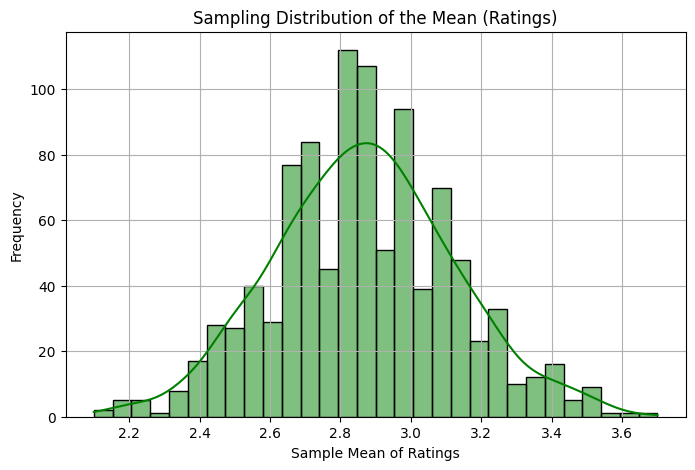

(np.float64(2.8664), np.float64(0.25758634291707067))

In [22]:
import numpy as np

# Set parameters
sample_size = 30  # Typical size for CLT to hold
num_samples = 1000  # Number of samples

# Generate sampling distribution of the mean
sampling_means = [np.random.choice(df["Rating"], sample_size, replace=True).mean() for _ in range(num_samples)]

# Plot the sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(sampling_means, bins=30, kde=True, color="green")
plt.xlabel("Sample Mean of Ratings")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Mean (Ratings)")
plt.grid(True)
plt.show()

# Calculate mean and standard deviation of the sampling distribution
sampling_mean = np.mean(sampling_means)
sampling_std = np.std(sampling_means, ddof=1)

sampling_mean, sampling_std
